Stats701 Homework 9  
Written by: David Li  

Consulted Huan Tan and Yingdan Zhang about general approach tips

    
# Part 1: Counting Words with mrjob  
Time Spent: About 2 hours

Question 1: Writing an mrjob that counts how many times each words occurs in text

Question 2: Testing on simple.txt, as a sample test case

Question 3: Run job on moby_dick.txt, save as word_counts.txt

Question 4: Plot of word frequencies on log-log scale for word_counts.txt

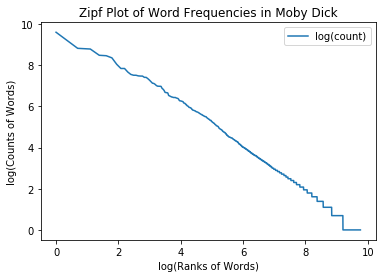

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

# First Read in the File
wordfreqs = pd.read_csv("word_counts.txt",delimiter="\t",header=None, names = ['word','count'])

# Sort by descending order due to rank specification
wordfreqs=wordfreqs.sort_values('count',ascending = False)

# Clean-up
wordfreqs=wordfreqs.reset_index()

# Generate log counts and log ranks
wordfreqs['log(count)']=np.log(wordfreqs['count'])

wordfreqs['log(ranks)']=list(1 + wordfreqs.index)
wordfreqs['log(ranks)']=np.log(wordfreqs['log(ranks)'])

# Generate the log-log plot
wordfreqs.plot(y='log(count)',x='log(ranks)')
plt.title("Zipf Plot of Word Frequencies in Moby Dick")
plt.xlabel("log(Ranks of Words)")
plt.ylabel("log(Counts of Words)")
plt.show()

Question 5: Comments about the plot of word frequencies

Zipf's law says that the log-log relationship between word frequency and frequency rank should be about linear. Looking at this graph, it does look consistent with and demonstrates Zipf's law pretty well; line is fairly linear.

# Part 2: Computing Sample Statistics with mrjob  
Time Spent: About 4 hours

Question 1: Writing mr_summary_stats.py that outputs summary statistic tuples

Question 2: Testing program on a smaller file, write output

Question 3: Use program on larger file, write output

Question 4: Display 95% Confidence Intervals for sample means of populations

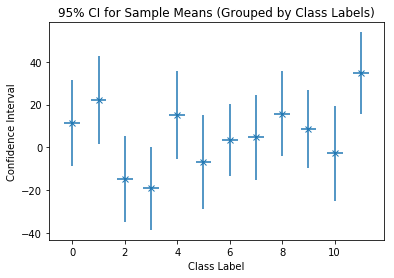

In [8]:
from scipy import stats
import math

# Some constants, used for the confidence intervals
zmul = stats.norm.ppf(0.975)

# Some lists, to store values in a way to input into the plot requirements
populationlabels = []
meanlist=[]
errormarginlist=[]

# Open the File, and parse the data
summfile = open("summary_large.txt")
for line in summfile:
    populationlabels.append(int(line.split()[0]))
    meanlist.append(float(line.split()[2][:-1]))
    errormarginlist.append(zmul * math.sqrt(float(line.split()[3][:-1]))/math.sqrt(float(line.split()[1][1:-1])))

# Turn into pandas series for usable structure
populationlabels = pd.Series(populationlabels)
meanlist = pd.Series(meanlist)
errormarginlist = pd.Series(errormarginlist)

# Plot, by class label
plt.errorbar(x = populationlabels,y = meanlist, xerr=0.3, yerr=errormarginlist, fmt = 'x')
plt.xlabel("Class Label")
plt.ylabel("Confidence Interval")
plt.title("95% CI for Sample Means (Grouped by Class Labels)")
plt.show()

# Part 3: Graph Processing  
Time Spent: About 6 hours

Question 1: PySpark job of list of triangles

Question 2: Run on smaller test, save and include file

There were 6 triangles in small_triangle_list.txt

Question 3: Run on larger data, save and include file